In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_normal  = pd.read_csv('output.csv') # Load các thông tin các video về âm nhạc thường
df_normal.head()

,title,description,channelTitle,tags,publishedAt,duration,definition,caption,viewCount,likeCount,commentCount,favoriteCount,topicCategories,madeForKids,privacyStatus,embeddable,defaultAudioLanguage,defaultLanguage
0,"NHẠC THỂ DỤC BUỔI SÁNG, NHẠC THỂ DỤC SÔI ĐỘNG ...","NHẠC THỂ DỤC BUỔI SÁNG, NHẠC THỂ DỤC SÔI ĐỘNG ...",Hieu AZ,"[""NHẠC THỂ DỤC BUỔI SÁNG"",""NHẠC THỂ DỤC SÔI ĐỘ...",2018-10-06T03:42:17Z,PT28M15S,sd,False,3009630,10412.0,335.0,0,"[""https://en.wikipedia.org/wiki/Electronic_mus...",False,public,True,NaN,NaN
1,25 PHÚT THỂ DỤC GIẢM BÉO BỤNG HIỆU QUẢ NHẤT 20...,Bảo Ngọc Aerobic với các bài tập aerobic hiện ...,Bảo Ngọc Aerobic,"[""aerobic"",""bảo ngọc aerobic"",""giảm eo"",""giảm ...",2022-03-30T22:00:13Z,PT27M4S,hd,False,9051009,26992.0,646.0,0,"[""https://en.wikipedia.org/wiki/Electronic_mus...",False,public,True,vi,NaN
2,"nhạc tập thể dục sáng,nhạc tập thể dục remix ,...",30p tập thể dục buổi sáng,Hieu AZ,"[""nhạc tập thể dục remix"",""nhạc tập thể dục sá...",2020-04-26T10:51:38Z,PT41M4S,hd,False,1192795,4479.0,220.0,0,"[""https://en.wikipedia.org/wiki/Electronic_mus...",False,public,True,NaN,NaN
3,Bé Mầm Non Tập Thể Dục Buổi Sáng - Nhạc Thiếu ...,♫ Bé Mầm Non Tập Thể Dục Buổi Sáng - Nhạc Thiế...,NhacPro - Kids,"[""NhacPro - Kids"",""Nhacpro"",""nhacpro kids"",""Nh...",2018-05-23T02:04:44Z,PT10M29S,hd,False,204765670,441935.0,NaN,0,"[""https://en.wikipedia.org/wiki/Music""]",True,public,True,vi,NaN
4,Nhạc hiệu thể dục buổi sáng trên VTV1 một thời...,khu,nguyen lanlan,"[""hfjsehfejhd""]",2020-12-29T01:50:44Z,PT3M23S,hd,False,735319,3625.0,213.0,0,"[""https://en.wikipedia.org/wiki/Electronic_mus...",False,public,True,vi,NaN


In [3]:
# Handling null values ​​in data frames
df_normal_preprocessed = df_normal.fillna({'description':'', 'tags':'', 'defaultAudioLanguage':'', 'likeCount':0, 'dislikeCount':0, 'commentCount':0, 'topicCategories':'', 'defaultLanguage': '' })
df_normal_preprocessed.head()

,title,description,channelTitle,tags,publishedAt,duration,definition,caption,viewCount,likeCount,commentCount,favoriteCount,topicCategories,madeForKids,privacyStatus,embeddable,defaultAudioLanguage,defaultLanguage
0,"NHẠC THỂ DỤC BUỔI SÁNG, NHẠC THỂ DỤC SÔI ĐỘNG ...","NHẠC THỂ DỤC BUỔI SÁNG, NHẠC THỂ DỤC SÔI ĐỘNG ...",Hieu AZ,"[""NHẠC THỂ DỤC BUỔI SÁNG"",""NHẠC THỂ DỤC SÔI ĐỘ...",2018-10-06T03:42:17Z,PT28M15S,sd,False,3009630,10412.0,335.0,0,"[""https://en.wikipedia.org/wiki/Electronic_mus...",False,public,True,,
1,25 PHÚT THỂ DỤC GIẢM BÉO BỤNG HIỆU QUẢ NHẤT 20...,Bảo Ngọc Aerobic với các bài tập aerobic hiện ...,Bảo Ngọc Aerobic,"[""aerobic"",""bảo ngọc aerobic"",""giảm eo"",""giảm ...",2022-03-30T22:00:13Z,PT27M4S,hd,False,9051009,26992.0,646.0,0,"[""https://en.wikipedia.org/wiki/Electronic_mus...",False,public,True,vi,
2,"nhạc tập thể dục sáng,nhạc tập thể dục remix ,...",30p tập thể dục buổi sáng,Hieu AZ,"[""nhạc tập thể dục remix"",""nhạc tập thể dục sá...",2020-04-26T10:51:38Z,PT41M4S,hd,False,1192795,4479.0,220.0,0,"[""https://en.wikipedia.org/wiki/Electronic_mus...",False,public,True,,
3,Bé Mầm Non Tập Thể Dục Buổi Sáng - Nhạc Thiếu ...,♫ Bé Mầm Non Tập Thể Dục Buổi Sáng - Nhạc Thiế...,NhacPro - Kids,"[""NhacPro - Kids"",""Nhacpro"",""nhacpro kids"",""Nh...",2018-05-23T02:04:44Z,PT10M29S,hd,False,204765670,441935.0,0.0,0,"[""https://en.wikipedia.org/wiki/Music""]",True,public,True,vi,
4,Nhạc hiệu thể dục buổi sáng trên VTV1 một thời...,khu,nguyen lanlan,"[""hfjsehfejhd""]",2020-12-29T01:50:44Z,PT3M23S,hd,False,735319,3625.0,213.0,0,"[""https://en.wikipedia.org/wiki/Electronic_mus...",False,public,True,vi,


In [4]:
# Describe attributes value with type is double
df_normal.describe()

,viewCount,likeCount,commentCount,favoriteCount
count,6.703000e+03,5.545000e+03,6.625000e+03,6703.0
mean,5.945169e+06,1.141139e+05,1.410658e+04,0.0
std,4.888331e+07,1.027556e+06,2.666172e+05,0.0
min,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,3.205000e+03,3.600000e+01,1.000000e+00,0.0
50%,4.932900e+04,8.920000e+02,1.300000e+01,0.0
75%,5.421790e+05,5.866000e+03,1.010000e+02,0.0
max,1.705687e+09,3.655115e+07,1.598189e+07,0.0


In [5]:
# Draw a statistical pie chart according to the number of views of the videos
def pieCharViewCounts(df):
    listVideo_10KView = df[df['viewCount']<100000]
    listVideo_100KView = df[df['viewCount']>=100000][df['viewCount']<1e6]
    listVideo_1MView = df[df['viewCount']>=1e6][df['viewCount']<1e7]
    listVideo_10MView = df[df['viewCount']>=1e7][df['viewCount']<1e8]
    listVideo_100MView = df[df['viewCount']>=1e8][df['viewCount']<1e9]

    y = np.array([len(listVideo_10KView),
                    len(listVideo_100KView),
                    len(listVideo_1MView),
                    len(listVideo_10MView),
                    len(listVideo_100MView),
                ])
    mylabel = ['Video 10 thousand views', 'Video 100 thousand views', 'Video million views', 'Video 10 million views', 'Video 100 million views']
   
    fig = plt.figure()
    fig.patch.set_facecolor('white')
    plt.pie(y, labels=mylabel)
    plt.show()

/tmp/ipykernel_12366/1265975072.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100KView = df[df['viewCount']>=100000][df['viewCount']<1e6]
/tmp/ipykernel_12366/1265975072.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_1MView = df[df['viewCount']>=1e6][df['viewCount']<1e7]
/tmp/ipykernel_12366/1265975072.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_10MView = df[df['viewCount']>=1e7][df['viewCount']<1e8]
/tmp/ipykernel_12366/1265975072.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100MView = df[df['viewCount']>=1e8][df['viewCount']<1e9]


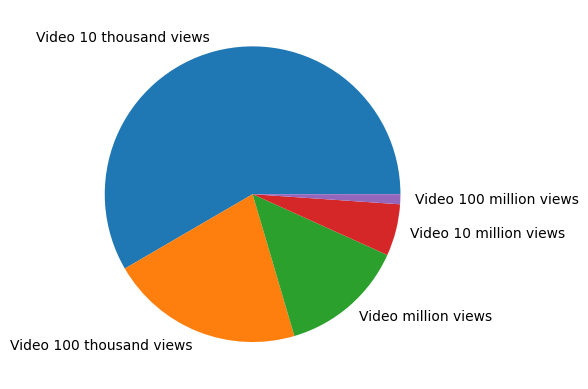

In [6]:
pieCharViewCounts(df_normal)